In [1]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

## Load datasets

In [2]:
# Load datasets
train = pd.read_csv('/kaggle/input/loan-approval-quantitativedata/train.csv')
test = pd.read_csv('/kaggle/input/loan-approval-quantitativedata/test.csv')
submission = pd.read_csv('/kaggle/input/loan-approval-quantitativedata/sample_submission.csv')

In [3]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [5]:
# Features
feature_list = [i for i in test.columns if i in train.columns]
feature_list

['id',
 'person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [6]:
# Target
target = [i for i in train.columns if i not in test.columns]
target

['loan_status']

## EDA and Initial Insights

In [7]:
# Features Analysis
feature_list

['id',
 'person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [8]:
# id

In [9]:
train.id.describe()

count    58645.000000
mean     29322.000000
std      16929.497605
min          0.000000
25%      14661.000000
50%      29322.000000
75%      43983.000000
max      58644.000000
Name: id, dtype: float64

In [10]:
len(train.id.unique())

58645

the column id can be discarded as it serve as an row-index feature.

In [11]:
train.drop(columns=['id'], inplace=True)

In [12]:
# person_age
train.person_age.describe()

count    58645.000000
mean        27.550857
std          6.033216
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        123.000000
Name: person_age, dtype: float64

In [13]:
train.person_age.unique()

array([ 37,  22,  29,  30,  27,  25,  21,  35,  31,  26,  28,  32,  23,
        24,  33,  44,  38,  43,  46,  48,  36,  41,  34,  40,  47,  42,
        51,  50,  39,  56,  60,  49,  58,  54,  45,  59,  65,  53,  55,
        57,  52,  62,  64,  84,  70,  66,  73,  69,  61,  20,  80,  76,
       123])

<Axes: >

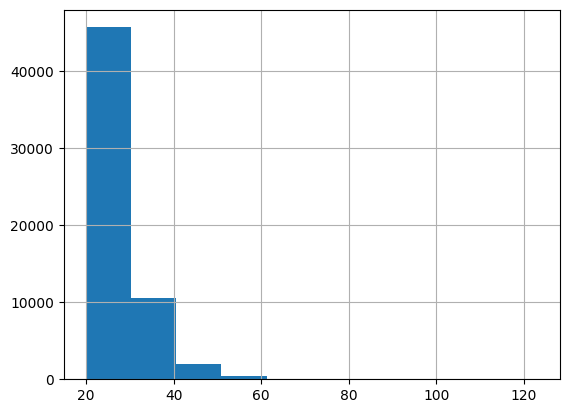

In [14]:
train.person_age.hist()

Age 123 is definitly an outlier.

In [15]:
print(f'The average loan approval per age: {train.groupby("person_age")["loan_status"].mean()}')

The average loan approval per age: person_age
20     0.250000
21     0.171031
22     0.160261
23     0.138105
24     0.140422
25     0.148017
26     0.147909
27     0.119101
28     0.140815
29     0.131498
30     0.125589
31     0.128326
32     0.121406
33     0.142420
34     0.153698
35     0.149652
36     0.156670
37     0.140121
38     0.100671
39     0.167910
40     0.141553
41     0.152425
42     0.185567
43     0.109375
44     0.183406
45     0.147239
46     0.079268
47     0.168000
48     0.206186
49     0.203390
50     0.174603
51     0.217391
52     0.225806
53     0.186667
54     0.183333
55     0.205882
56     0.068966
57     0.200000
58     0.285714
59     0.000000
60     0.214286
61     0.153846
62     0.142857
64     0.100000
65     0.153846
66     0.090909
69     0.000000
70     0.200000
73     0.333333
76     1.000000
80     1.000000
84     0.000000
123    0.000000
Name: loan_status, dtype: float64


In [16]:
train.person_age.isna().sum()

0

In [17]:
print('New train without age above 100 year old')
train = train[train['person_age'] <= 100]
train

New train without age above 100 year old


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [18]:
# person_income
train.person_income.describe()

count    5.864400e+04
mean     6.404665e+04
std      3.793125e+04
min      4.200000e+03
25%      4.200000e+04
50%      5.800000e+04
75%      7.560000e+04
max      1.900000e+06
Name: person_income, dtype: float64

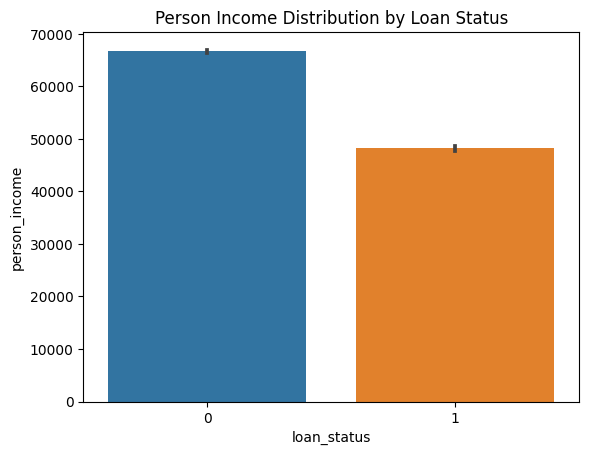

In [19]:
sns.barplot(x="loan_status", y="person_income", data=train)
plt.title("Person Income Distribution by Loan Status")
plt.show()

In [20]:
print(f'The average loan approval per income: {train.groupby("person_income")["loan_status"].mean()}')

The average loan approval per income: person_income
4200       0.000000
5000       0.000000
9600       0.428571
10000      0.000000
10140      0.000000
             ...   
948000     0.000000
1200000    0.000000
1824000    0.000000
1839784    0.000000
1900000    0.000000
Name: loan_status, Length: 2641, dtype: float64


In [21]:
pd.DataFrame(train.groupby("person_income")["loan_status"].value_counts().sort_index()).reset_index()

,person_income,loan_status,count
0,4200,0,1
1,5000,0,1
2,9600,0,8
3,9600,1,6
4,10000,0,1
...,...,...,...
3217,948000,0,1
3218,1200000,0,2
3219,1824000,0,1
3220,1839784,0,1


In [22]:
print("Let's scan the income ranges by loan status")
df = pd.DataFrame(train.groupby("person_income")["loan_status"].value_counts().sort_index()).reset_index()

# Initialize variables
ranges = []
current_range = []
previous_status = None

# Iterate through the DataFrame
for index, row in df.iterrows():
    current_status = row['loan_status']
    
    # If the status changes, save the current range
    if previous_status is not None and current_status != previous_status:
        ranges.append((current_range[0], current_range[-1], previous_status))
        current_range = []
    
    # Add the current income to the range
    current_range.append(row['person_income'])
    previous_status = current_status

# Add the last range if it exists
if current_range:
    ranges.append((current_range[0], current_range[-1], previous_status))

# Display the ranges
for start, end, status in ranges:
    print(f"Income range: {start} to {end}, Loan Status: {status}")

Let's scan the income ranges by loan status
Income range: 4200 to 9600, Loan Status: 0
Income range: 9600 to 9600, Loan Status: 1
Income range: 10000 to 12000, Loan Status: 0
Income range: 12000 to 12000, Loan Status: 1
Income range: 12360 to 12360, Loan Status: 0
Income range: 12500 to 12500, Loan Status: 1
Income range: 12600 to 12996, Loan Status: 0
Income range: 12996 to 13000, Loan Status: 1
Income range: 13200 to 13200, Loan Status: 0
Income range: 13200 to 13200, Loan Status: 1
Income range: 14000 to 14000, Loan Status: 0
Income range: 14000 to 14000, Loan Status: 1
Income range: 14400 to 14400, Loan Status: 0
Income range: 14400 to 14500, Loan Status: 1
Income range: 15000 to 15000, Loan Status: 0
Income range: 15000 to 15000, Loan Status: 1
Income range: 15120 to 15120, Loan Status: 0
Income range: 15120 to 15120, Loan Status: 1
Income range: 15360 to 15360, Loan Status: 0
Income range: 15436 to 15436, Loan Status: 1
Income range: 15500 to 15600, Loan Status: 0
Income range: 1

In [23]:
print('Income range below 9600 and above 400000 are loan denied.')

Income range below 9600 and above 400000 are loan denied.


In [24]:
# person_home_ownership
train.person_home_ownership.describe()

count     58644
unique        4
top        RENT
freq      30594
Name: person_home_ownership, dtype: object

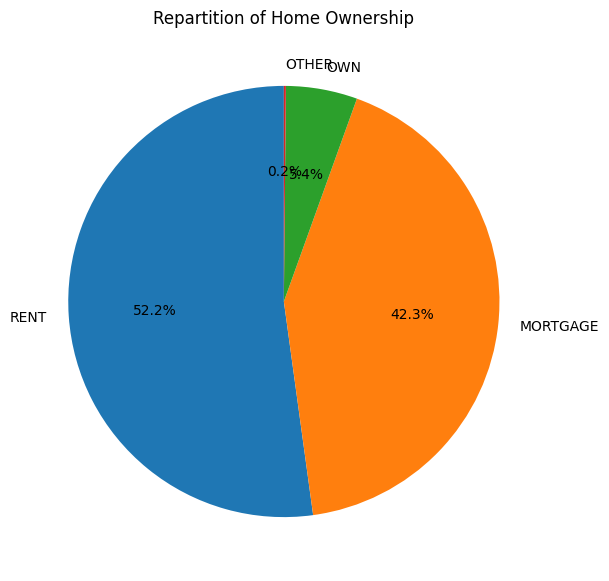

In [25]:
plt.figure(figsize=(10, 7))
plt.pie(train.person_home_ownership.value_counts(), 
        labels=train.person_home_ownership.value_counts().index, 
        autopct='%1.1f%%', 
        startangle=90)

plt.title('Repartition of Home Ownership')
# plt.axis('equal')
plt.show()

In [26]:
train.groupby('person_home_ownership')['loan_status'].value_counts().reset_index()

,person_home_ownership,loan_status,count
0,MORTGAGE,0,23340
1,MORTGAGE,1,1483
2,OTHER,0,74
3,OTHER,1,15
4,OWN,0,3095
5,OWN,1,43
6,RENT,0,23785
7,RENT,1,6809


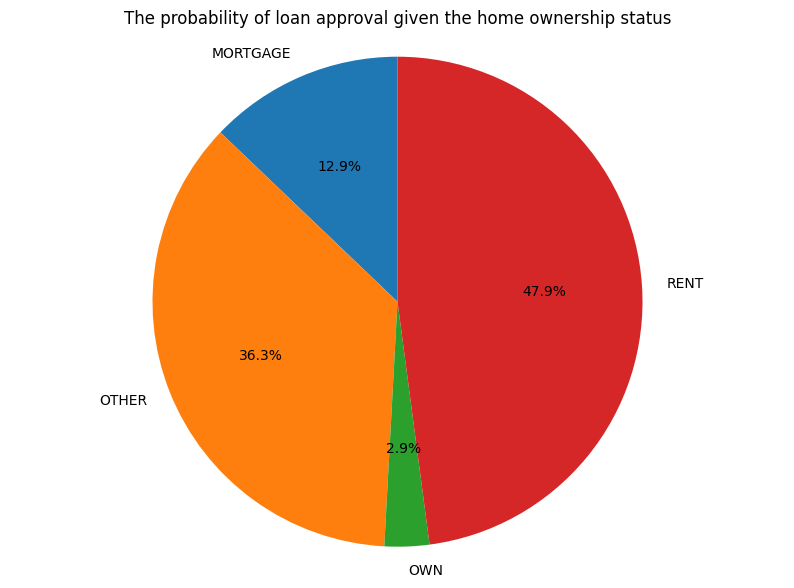

In [27]:
plt.figure(figsize=(10, 7))
plt.pie(train.groupby('person_home_ownership')['loan_status'].mean(), 
        labels=train.groupby('person_home_ownership')['loan_status'].mean().index, 
        autopct='%1.1f%%', 
        startangle=90)

plt.title('The probability of loan approval given the home ownership status')
plt.axis('equal')
plt.show()

In [28]:
# person_emp_length
train.person_emp_length.describe()

count    58644.000000
mean         4.700975
std          3.959807
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [29]:
train.person_emp_length.unique()

array([  0.,   6.,   8.,  14.,   2.,   9.,  11.,   5.,   1.,  13.,   3.,
        10.,  12.,   4.,   7.,  21.,  17.,  16.,  18.,  19.,  15.,  20.,
        23.,  24.,  26.,  22.,  25.,  41.,  27.,  28.,  35.,  29.,  30.,
        31., 123.,  39.])

123 is definitly an outlier, can't imaging working history of a 123 years!

In [30]:
print('get rid of the outlier:\n')
train = train[train['person_emp_length'] <= 40]
train

get rid of the outlier:



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [31]:
print('The probabilty of loan approval given the working history length:\n')
train.groupby('person_emp_length')['loan_status'].mean().reset_index().sort_values('loan_status')

The probabilty of loan approval given the working history length:



,person_emp_length,loan_status
33,39.0,0.000000
30,30.0,0.000000
29,29.0,0.000000
32,35.0,0.000000
13,13.0,0.053952
16,16.0,0.067857
24,24.0,0.071429
18,18.0,0.071895
12,12.0,0.075113
11,11.0,0.078471


In [32]:
print("Let's scan the working history ranges by loan status:\n")
df = pd.DataFrame(train.groupby("person_emp_length")["loan_status"].value_counts().sort_index()).reset_index()

# Initialize variables
ranges = []
current_range = []
previous_status = None

# Iterate through the DataFrame
for index, row in df.iterrows():
    current_status = row['loan_status']
    
    # If the status changes, save the current range
    if previous_status is not None and current_status != previous_status:
        ranges.append((current_range[0], current_range[-1], previous_status))
        current_range = []
    
    # Add the current income to the range
    current_range.append(row['person_emp_length'])
    previous_status = current_status

# Add the last range if it exists
if current_range:
    ranges.append((current_range[0], current_range[-1], previous_status))

# Display the ranges
for start, end, status in ranges:
    print(f"Working history range: {start} to {end}, Loan Status: {status}")

Let's scan the working history ranges by loan status:

Working history range: 0.0 to 0.0, Loan Status: 0.0
Working history range: 0.0 to 0.0, Loan Status: 1.0
Working history range: 1.0 to 1.0, Loan Status: 0.0
Working history range: 1.0 to 1.0, Loan Status: 1.0
Working history range: 2.0 to 2.0, Loan Status: 0.0
Working history range: 2.0 to 2.0, Loan Status: 1.0
Working history range: 3.0 to 3.0, Loan Status: 0.0
Working history range: 3.0 to 3.0, Loan Status: 1.0
Working history range: 4.0 to 4.0, Loan Status: 0.0
Working history range: 4.0 to 4.0, Loan Status: 1.0
Working history range: 5.0 to 5.0, Loan Status: 0.0
Working history range: 5.0 to 5.0, Loan Status: 1.0
Working history range: 6.0 to 6.0, Loan Status: 0.0
Working history range: 6.0 to 6.0, Loan Status: 1.0
Working history range: 7.0 to 7.0, Loan Status: 0.0
Working history range: 7.0 to 7.0, Loan Status: 1.0
Working history range: 8.0 to 8.0, Loan Status: 0.0
Working history range: 8.0 to 8.0, Loan Status: 1.0
Working h

Working history above 31 years is a reason to deny loan! 

In [33]:
# loan_intent
train.loan_intent.describe()

count         58640
unique            6
top       EDUCATION
freq          12271
Name: loan_intent, dtype: object

In [34]:
train.loan_intent.value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10933
PERSONAL             10014
VENTURE              10010
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6279
Name: count, dtype: int64

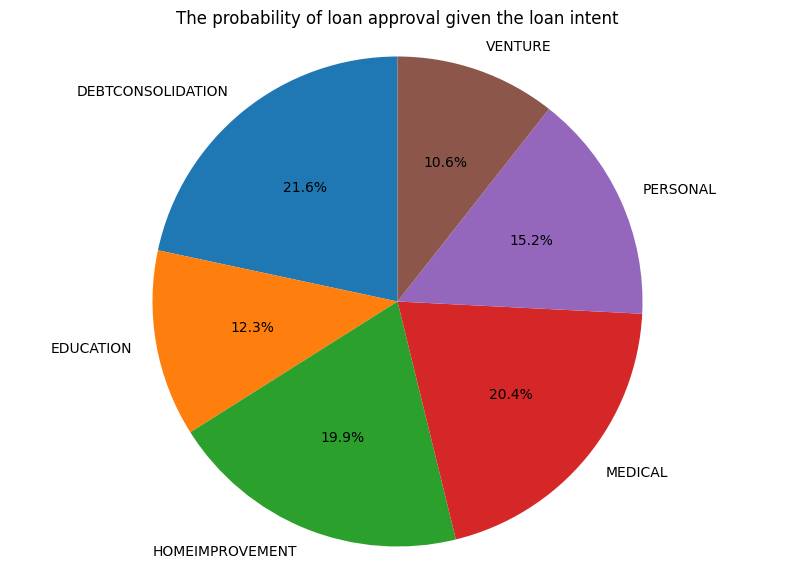

In [35]:
plt.figure(figsize=(10, 7))
plt.pie(train.groupby('loan_intent')['loan_status'].mean(), 
        labels=train.groupby('loan_intent')['loan_status'].mean().index, 
        autopct='%1.1f%%', 
        startangle=90)

plt.title('The probability of loan approval given the loan intent')
plt.axis('equal')
plt.show()

In [36]:
# loan_grade
train.loan_grade.describe()

count     58640
unique        7
top           A
freq      20984
Name: loan_grade, dtype: object

In [37]:
train.loan_grade.value_counts()

loan_grade
A    20984
B    20397
C    11036
D     5032
E     1009
F      149
G       33
Name: count, dtype: int64

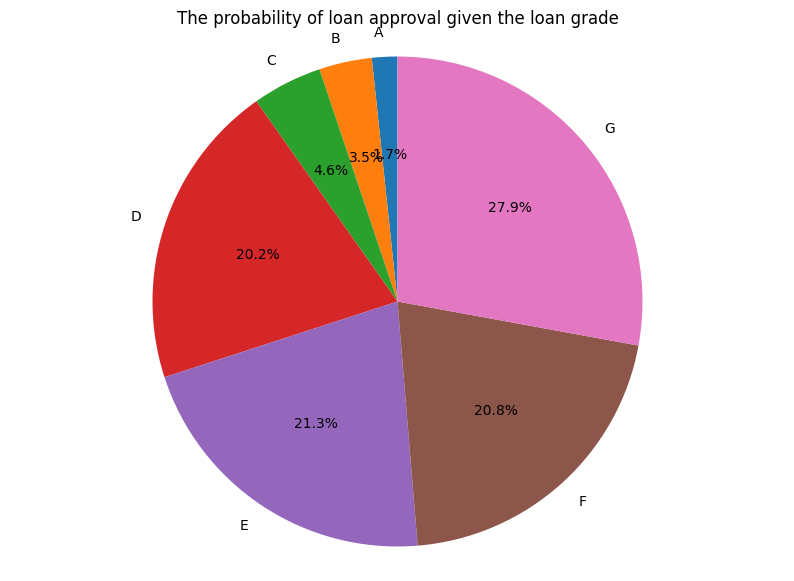

In [38]:
plt.figure(figsize=(10, 7))
plt.pie(train.groupby('loan_grade')['loan_status'].mean(), 
        labels=train.groupby('loan_grade')['loan_status'].mean().index, 
        autopct='%1.1f%%', 
        startangle=90)

plt.title('The probability of loan approval given the loan grade')
plt.axis('equal')
plt.show()

In [39]:
# loan_amnt
train.loan_amnt.describe()

count    58640.000000
mean      9217.298806
std       5563.390592
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='loan_amnt', ylabel='Density'>

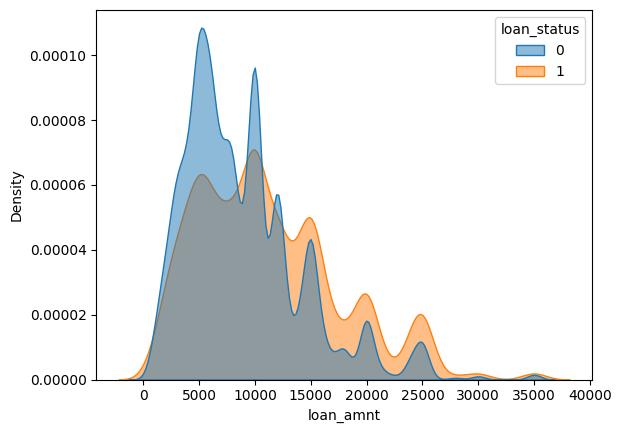

In [40]:
sns.kdeplot(data=train, 
            x='loan_amnt', 
            hue='loan_status', fill=True, common_norm=False, alpha=0.5)

In [41]:
print('The average denied/accepted loan:\n')
train.groupby('loan_status')['loan_amnt'].mean()

The average denied/accepted loan:



loan_status
0     8888.870414
1    11195.618637
Name: loan_amnt, dtype: float64

On average, the greater the loan, the more likely to get approved.

In [42]:
# loan_int_rate
train.loan_int_rate.describe()

count    58640.000000
mean        10.677715
std          3.034723
min          5.420000
25%          7.880000
50%         10.750000
75%         12.990000
max         23.220000
Name: loan_int_rate, dtype: float64

In [43]:
print('The average interest rate of the denied/accepted loan:\n')
train.groupby('loan_status')['loan_int_rate'].mean()

The average interest rate of the denied/accepted loan:



loan_status
0    10.258653
1    13.201976
Name: loan_int_rate, dtype: float64

On average, the approved loan have higher interest rate than the denied ones.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='loan_int_rate', ylabel='Density'>

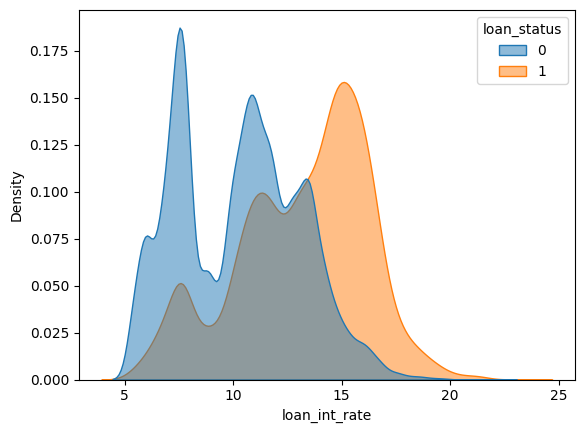

In [44]:
sns.kdeplot(data=train, 
            x='loan_int_rate', 
            hue='loan_status', fill=True, common_norm=False, alpha=0.5)

In [45]:
# loan_percent_income
train.loan_percent_income.describe()

count    58640.000000
mean         0.159237
std          0.091691
min          0.000000
25%          0.090000
50%          0.140000
75%          0.210000
max          0.830000
Name: loan_percent_income, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='loan_percent_income', ylabel='Density'>

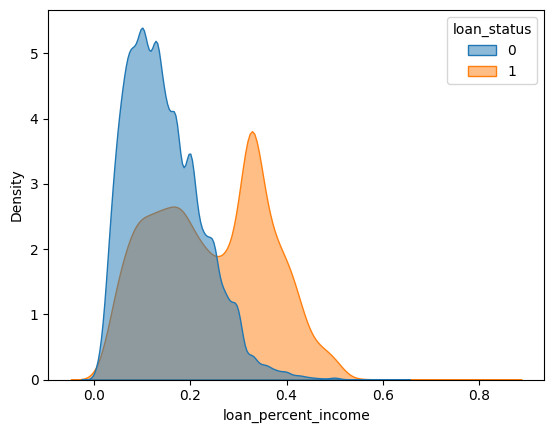

In [46]:
sns.kdeplot(data=train, 
            x='loan_percent_income', 
            hue='loan_status', fill=True, common_norm=False, alpha=0.5)

In [47]:
print('The average loan/income percentage of the denied/accepted loan:\n')
train.groupby('loan_status')['loan_percent_income'].mean()

The average loan/income percentage of the denied/accepted loan:



loan_status
0    0.145107
1    0.244350
Name: loan_percent_income, dtype: float64

In [48]:
print('The correlation between loan_percent_income and loan_status:\n')
train.loan_percent_income.corr(train.loan_status)

The correlation between loan_percent_income and loan_status:



0.3782240265062049

On average, the higher the loan to income ratio, the higher the chance on loan approval.

In [49]:
# cb_person_default_on_file
train.cb_person_default_on_file.describe()

count     58640
unique        2
top           N
freq      49940
Name: cb_person_default_on_file, dtype: object

Distribution of cb_person_default_on_file frequency:



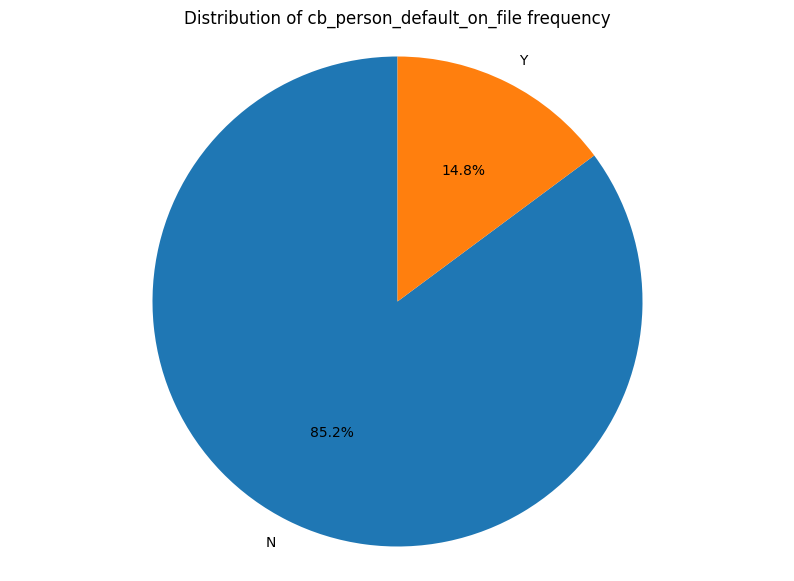

In [50]:
print('Distribution of cb_person_default_on_file frequency:\n')
plt.figure(figsize=(10, 7))
plt.pie(train.cb_person_default_on_file.value_counts(), 
        labels=train.cb_person_default_on_file.value_counts().index, 
        autopct='%1.1f%%', 
        startangle=90)

plt.title('Distribution of cb_person_default_on_file frequency')
plt.axis('equal')
plt.show()

The probability of loan approval given cb_person_default_on_file:



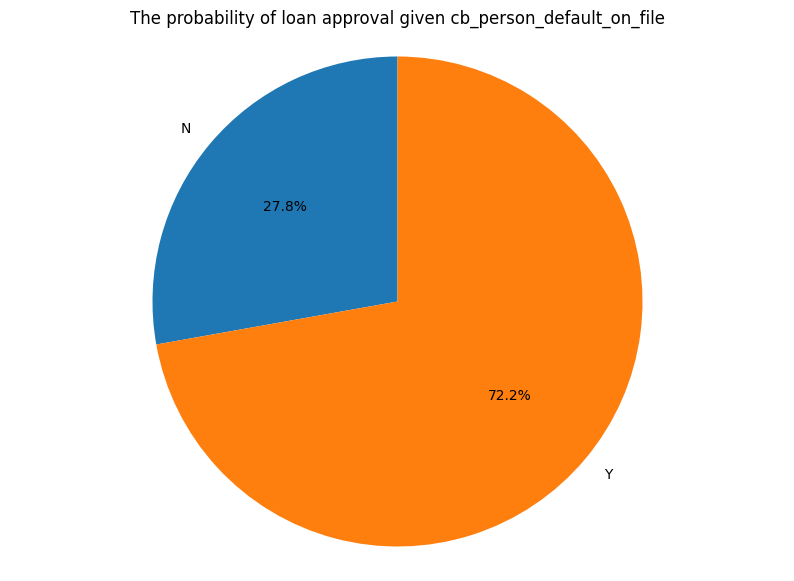

In [51]:
print('The probability of loan approval given cb_person_default_on_file:\n')

plt.figure(figsize=(10, 7))
plt.pie(train.groupby('cb_person_default_on_file')['loan_status'].mean(), 
        labels=train.groupby('cb_person_default_on_file')['loan_status'].mean().index, 
        autopct='%1.1f%%', 
        startangle=90)

plt.title('The probability of loan approval given cb_person_default_on_file')
plt.axis('equal')
plt.show()

In [52]:
# cb_person_cred_hist_length
train.cb_person_cred_hist_length.describe()

count    58640.000000
mean         5.813199
std          4.028488
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='cb_person_cred_hist_length', ylabel='Density'>

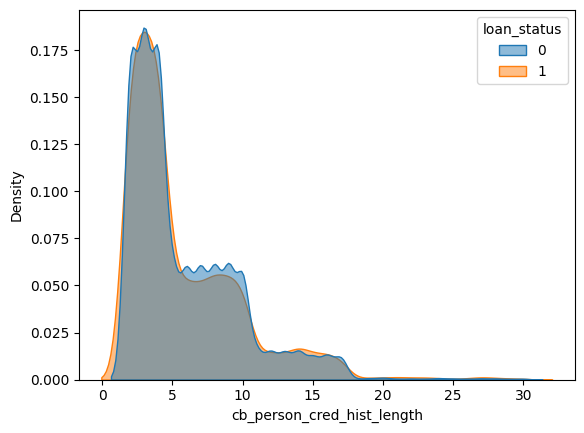

In [53]:
sns.kdeplot(data=train, 
            x='cb_person_cred_hist_length', 
            hue='loan_status', fill=True, common_norm=False, alpha=0.5)

In [54]:
# loan_status
train.loan_status.describe()

count    58640.000000
mean         0.142377
std          0.349440
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [55]:
train.loan_status.value_counts(normalize=True)

loan_status
0    0.857623
1    0.142377
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_status', ylabel='Density'>

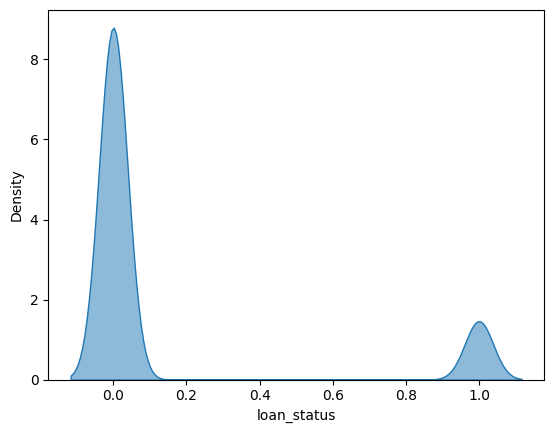

In [56]:
sns.kdeplot(data=train, 
            x='loan_status', fill=True, common_norm=False, alpha=0.5)

## Data Cleaning

In [57]:
# Missing data
train.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [58]:
# +/- infinite values
np.isinf(train.select_dtypes(exclude='object')).sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [59]:
# duplicated rows
dup_rows_count = train.duplicated(keep=False).sum()
print("Duplicate Rows Count (including all duplicates):", dup_rows_count)

# duplicated columns
dup_col_count_all = train.T.duplicated(keep=False).sum()
print('Duplicate Columns Counts (including all duplicates):', dup_col_count_all)

Duplicate Rows Count (including all duplicates): 0
Duplicate Columns Counts (including all duplicates): 0


## Feature Engineering

In [60]:
# Encode categorical variables
train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [61]:
train.select_dtypes(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
58640,MORTGAGE,EDUCATION,D,Y
58641,RENT,MEDICAL,C,N
58642,RENT,EDUCATION,D,N
58643,RENT,EDUCATION,A,N


In [62]:
train_encoded = pd.get_dummies(train, drop_first=True, dtype=int)
train_encoded

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,37,35000,0.0,6000,11.49,0.17,14,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,22,56000,6.0,4000,13.35,0.07,2,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,29,28800,8.0,6000,8.90,0.21,10,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,30,70000,14.0,12000,11.11,0.17,5,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,22,60000,2.0,6000,6.92,0.10,3,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,25000,15.95,0.21,10,0,0,0,...,0,0,0,0,0,1,0,0,0,1
58641,28,28800,0.0,10000,12.73,0.35,8,1,0,0,...,1,0,0,0,1,0,0,0,0,0
58642,23,44000,7.0,6800,16.00,0.15,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
58643,22,30000,2.0,5000,8.90,0.17,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y = train_encoded['loan_status'].copy()
X = train_encoded.drop(columns=['loan_status']).copy()

In [64]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,37,35000,0.0,6000,11.49,0.17,14,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,22,56000,6.0,4000,13.35,0.07,2,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,29,28800,8.0,6000,8.90,0.21,10,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,70000,14.0,12000,11.11,0.17,5,0,0,1,...,0,0,1,1,0,0,0,0,0,0
4,22,60000,2.0,6000,6.92,0.10,3,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [65]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

# Initial Modeling

In [66]:
# initial modeling with logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=7)

# improve the model's ability to predict both classes
smote = SMOTE(random_state=7)
X_train, y_train = smote.fit_resample(X_train, y_train)

classifier = LogisticRegression(
    # class_weight='balanced', 
    random_state=7
)


classifier.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [67]:
# Evaluations
from sklearn.metrics import classification_report

target_names = ['0', '1']
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15087
           1       0.48      0.81      0.61      2505

    accuracy                           0.85     17592
   macro avg       0.72      0.83      0.76     17592
weighted avg       0.90      0.85      0.86     17592



In [68]:
# Area Under the ROC Curve

from sklearn.metrics import roc_auc_score

y_proba = classifier.predict_proba(X_train)
auc = roc_auc_score(y_train, y_proba[:, 1])

print('AUC for the test set: ', auc)

AUC for the test set:  0.9102672990091702


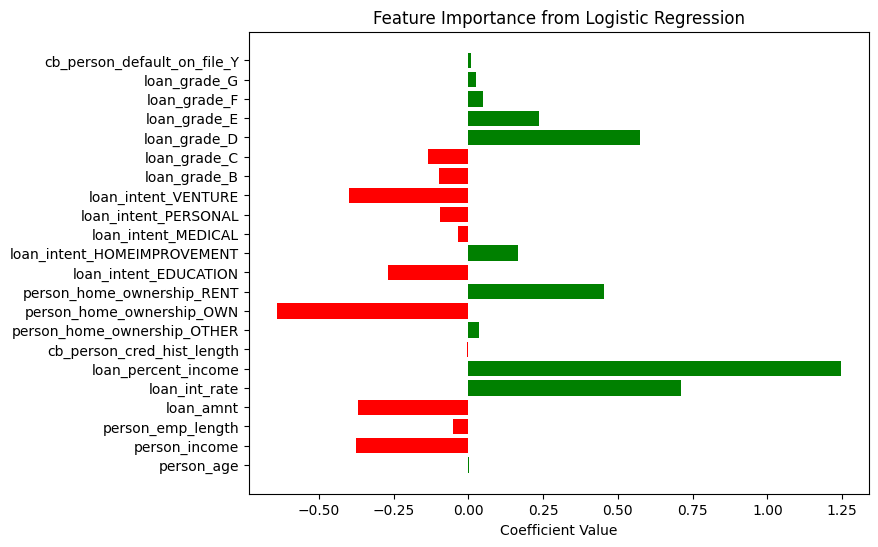

In [69]:
# Feature Importance

coefficients = classifier.coef_[0]
features = train_encoded.drop(columns=['loan_status']).columns
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

colors = importance_df['Coefficient'].apply(lambda x: 'green' if x > 0 else 'red')

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color=colors)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance from Logistic Regression")
plt.show()

# Model Optimization

Let's apply, for higher and stable accuracy:

* Multi-fold, cross-validated hyperparameter Optimization using Optuna

for LightGBM classifier.

In [70]:
import optuna
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split

In [71]:
# use original dataset as LightGBM can handle outliers and target imbalance 
y = train['loan_status'].copy()
X = train.drop(columns=['loan_status']).copy()

# Convert object features to 'category' dtype
X[train.select_dtypes(include='object').columns] = X[train.select_dtypes(include='object').columns].astype('category')

# split train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=7)

In [ ]:
# # Define the Optuna objective function.
# def objective(trial):
#     # Suggest hyperparameters for LightGBM
#     param = {
#     # Tunable parameters
#         'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
#         'num_leaves': trial.suggest_int('num_leaves', 16, 256),
#         'max_depth': trial.suggest_int('max_depth', 3, 20),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-9, 1e-1, log=True),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 10, log=True),
#         'subsample': trial.suggest_float('subsample', 0.4, 1.0),
#         'subsample_freq': trial.suggest_int('subsample_freq', 1, 10),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
#         'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 1.0),
#         # Fixed parameters
#         'objective': 'binary',
#         'random_state': 7,
#         'n_jobs': -1,
#         'device': 'gpu'
#     }
#     # Initialize classifier with these parameters
#     clf = lgb.LGBMClassifier(**param)
    
#     # Set up 10-fold Stratified Cross-Validation
#     cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
#     # Get out-of-fold probability predictions (only for the positive class)
#     y_proba = cross_val_predict(clf, X_train, y_train, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
    
#     # Compute the auc
#     auc = roc_auc_score(y_train, y_proba)
    
#     # Return the ROC AUC score to be maximized.
#     return auc

In [ ]:
# # Create and run the Optuna study (maximize auc score)
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10, gc_after_trial=True, show_progress_bar=True)

# print("\nBest trial:")
# trial = study.best_trial
# print(" Best ROC AUC (CV): {:.4f}".format(trial.value))
# print(" Best hyperparameters: ")
# for key, value in trial.params.items():
#     print(" {}: {}".format(key, value))

In [72]:
# computer best_params with auc_value of 0.9572721575646971
best_params = {
    'boosting_type': 'gbdt', 
    'num_leaves': 141, 
    'max_depth': 10, 
    'learning_rate': 0.042733381152349155, 
    'n_estimators': 515, 
    'min_child_samples': 80, 
    'min_child_weight': 0.0385261866838019, 
    'subsample': 0.6658662198607374, 
    'subsample_freq': 4, 
    'colsample_bytree': 0.5195788054971431, 
    'reg_alpha': 0.02013054958934401, 
    'reg_lambda': 5.918478596779895e-06, 
    'min_split_gain': 0.8356106471567083
}

In [73]:
# Train the model with the best parameters
# best_params = trial.params.copy()
best_params.update({'objective': 'binary', 'random_state': 7, 'n_jobs': -1})
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5844, number of negative: 35204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 41048, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142370 -> initscore=-1.795744
[LightGBM] [Info] Start training from score -1.795744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(colsample_bytree=0.5195788054971431,
               learning_rate=0.042733381152349155, max_depth=10,
               min_child_samples=80, min_child_weight=0.0385261866838019,
               min_split_gain=0.8356106471567083, n_estimators=515, n_jobs=-1,
               num_leaves=141, objective='binary', random_state=7,
               reg_alpha=0.02013054958934401, reg_lambda=5.918478596779895e-06,
               subsample=0.6658662198607374, subsample_freq=4)

# Model Evaluation

In [74]:
# Classification Report

target_names = ['0', '1']
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15087
           1       0.93      0.73      0.82      2505

    accuracy                           0.95     17592
   macro avg       0.94      0.86      0.90     17592
weighted avg       0.95      0.95      0.95     17592



In [75]:
# AUC score
y_test_proba = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_proba)
print("\nTest ROC AUC: {:.4f}".format(test_auc))


Test ROC AUC: 0.9598


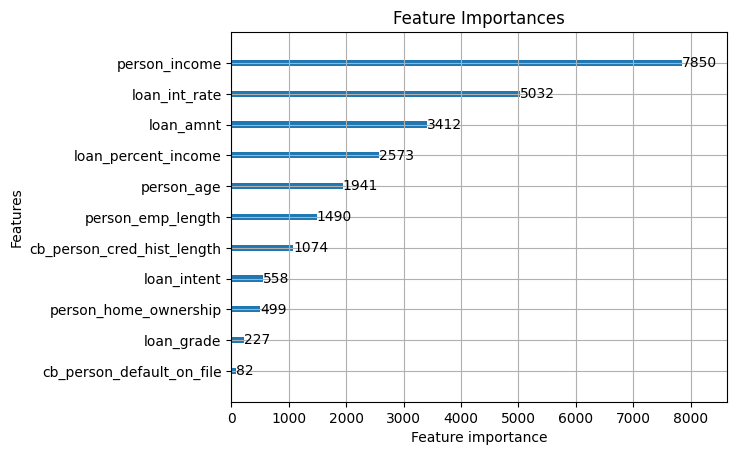

In [76]:
# Global Expalainability by Feature Importances
ax = lgb.plot_importance(best_model,
                         # importance_type='gain',
                         title="Feature Importances")
plt.show()

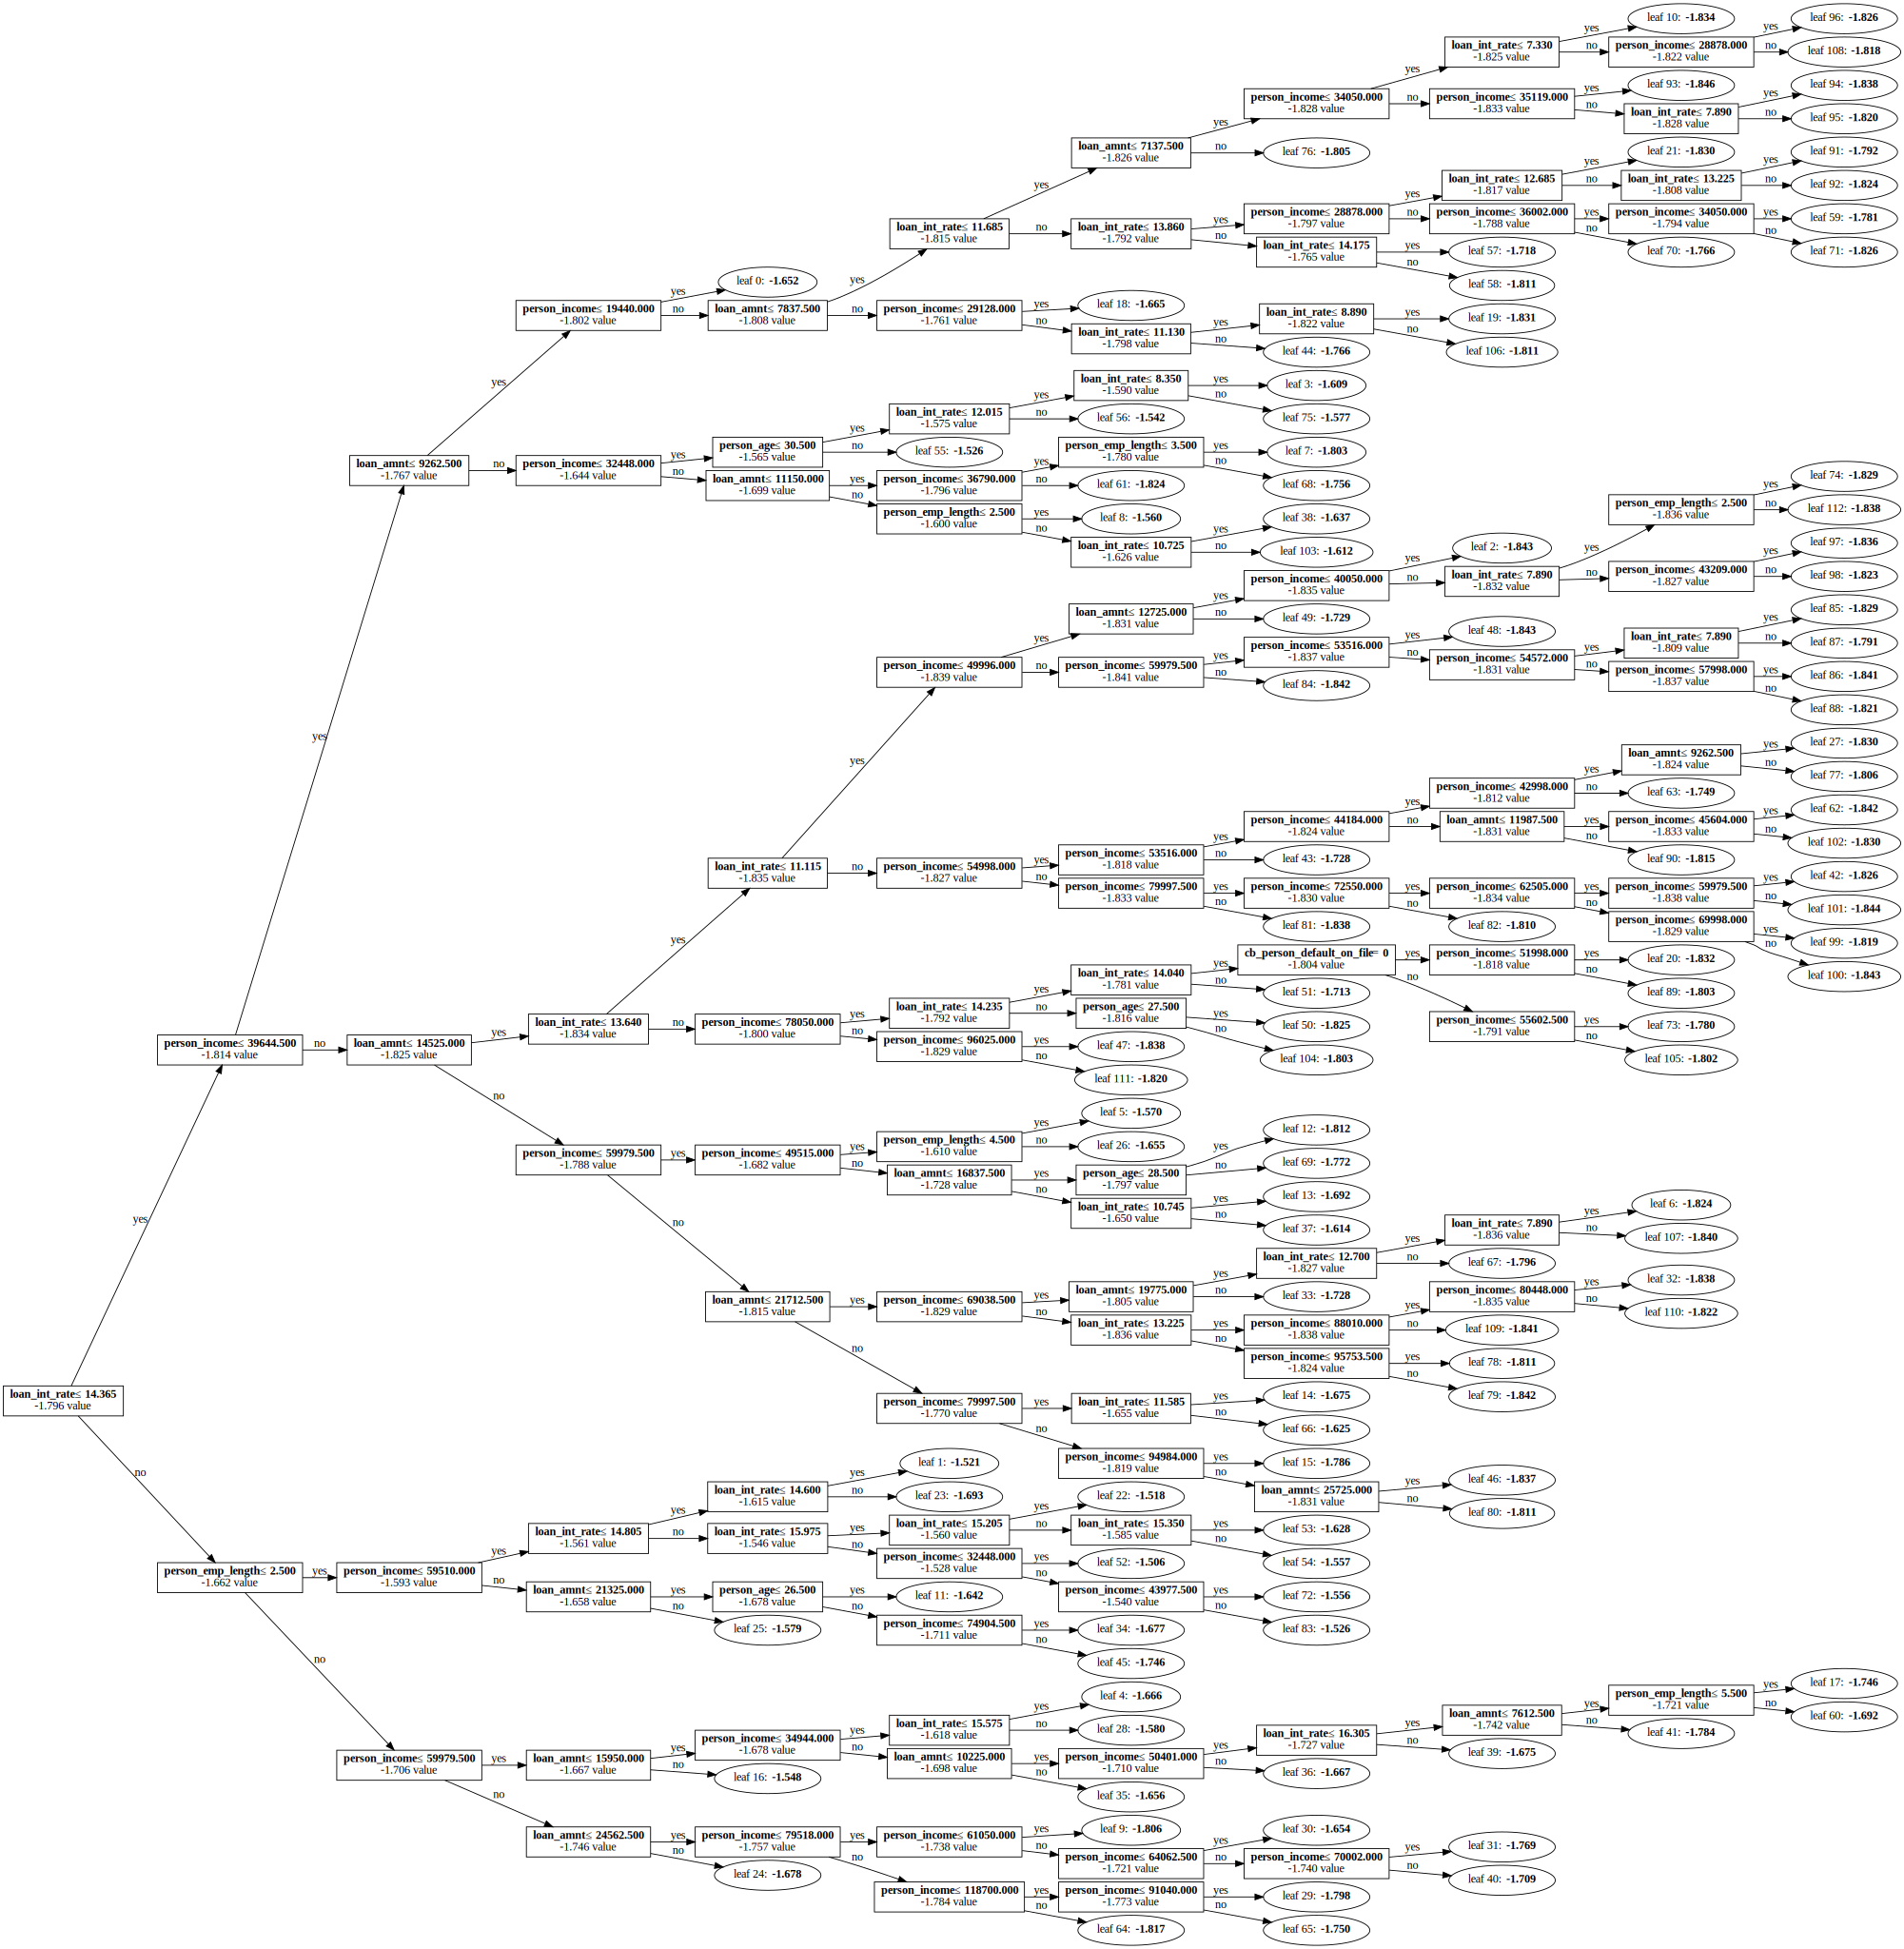

In [77]:
# Global Explainability by model's entire decision making mecanism
lgb.create_tree_digraph(best_model, show_info='internal_value')

# Save Model

In [78]:
import joblib

# save model
joblib.dump(best_model, 'model.pkl')

# # load model
# best_model = joblib.load('model.pkl')

['model.pkl']